# **Data Visualization**

## Objectives

* Answer business requirement 1:
  * The client is interested in conducting a study to visually differentiate a cherry leaf that is healthy and one that contains powdery mildew.

## Inputs

* inputs/cherry_leaves_dataset/cherry-leaves/train
* inputs/cherry_leaves_dataset/cherry-leaves/validation
* inputs/cherry_leaves_dataset/cherry-leaves/test

## Outputs

* Image shape embeddings pickle file
* Mean and variability of images plot for each class
* Plot to distinguish the contrast between healthy cherry leaves and those infected with powdery mildew
* Generate code that answers business requirement 1 and can be used to build image montage on Streamlit dashboard


---

# Set Working Directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/milestone-project-mildew-detection-in-cherry-leaves/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/milestone-project-mildew-detection-in-cherry-leaves'

---

# **Set Data Directory**


### Set input directories

In [4]:
my_data_dir = 'inputs/cherry_leaves_dataset/cherry-leaves'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

### Set output directories

In [5]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(current_dir) and version in os.listdir(current_dir + '/outputs'):
  print('Old version is already available create a new version.')
  pass
else:
  os.makedirs(name=file_path)

Old version is already available create a new version.


### Set label names

In [6]:
labels = os.listdir(train_path)
print('Labels for the images are',labels)

Labels for the images are ['powdery_mildew', 'healthy']


### Import Libraries

In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
sns.set_style("white")
from matplotlib.image import imread

---

# Data Visualization of Image Data

Check avarage image size on the train set

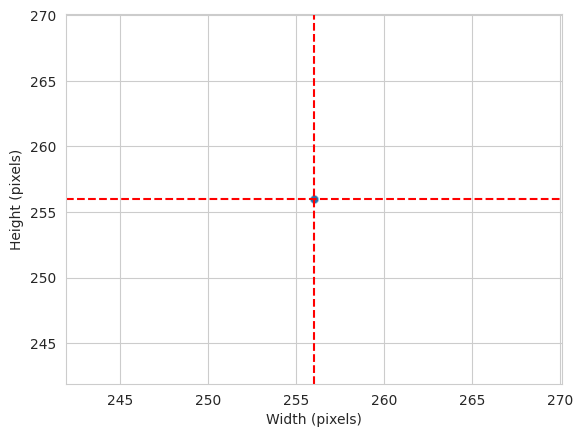

Width average: 256 
Height average: 256


In [8]:
#check image dimensions from directory and store them in height and width
dim1, dim2 = [], []
for label in labels:
    for image_filename in os.listdir(train_path + '/' + label):
        img = imread(train_path + '/' + label + '/' + image_filename)
        d1, d2, colors = img.shape
        dim1.append(d1)  # image height
        dim2.append(d2)  # image width
# creating scatter plot of the image dimensions
sns.set_style("whitegrid")
fig, axes = plt.subplots()
sns.scatterplot(x=dim2, y=dim1, alpha=0.2)
axes.set_xlabel("Width (pixels)")
axes.set_ylabel("Height (pixels)")
dim1_mean = int(np.array(dim1).mean())
dim2_mean = int(np.array(dim2).mean())
axes.axvline(x=dim1_mean, color='r', linestyle='--')
axes.axhline(y=dim2_mean, color='r', linestyle='--')
plt.show()
print(f"Width average: {dim2_mean} \nHeight average: {dim1_mean}")


Images size for training the model is the average from all images in the train set.

In [9]:
image_shape = (dim1_mean, dim2_mean, 3)
image_shape

(256, 256, 3)

Save the image shape embedding

In [10]:
joblib.dump(value=image_shape ,
            filename=f"{file_path}/image_shape.pkl")

['outputs/v1/image_shape.pkl']

---

# Average and variability of images per label

### Load images into an array

In [11]:
from tensorflow.keras.preprocessing import image

def load_image_as_array(my_data_dir, new_size=(50,50), n_images_per_label = 20):
  
  X, y = np.array([], dtype='int'), np.array([], dtype='object')
  labels = os.listdir(my_data_dir)

  for label in labels:
    counter = 0
    for image_filename in os.listdir(my_data_dir + '/' + label):
      # n_images_per_label: we set a limit, since it may take too much time
      if counter < n_images_per_label:
        
        img = image.load_img(my_data_dir + '/' + label + '/' + image_filename, target_size=new_size)
        if image.img_to_array(img).max() > 1: 
          img_resized = image.img_to_array(img) / 255
        else: 
          img_resized = image.img_to_array(img)
        
        X = np.append(X, img_resized).reshape(-1, new_size[0], new_size[1], img_resized.shape[2])
        y = np.append(y, label)
        counter += 1

  return X, y

### Load image shapes and labels into an array

In [12]:
X, y = load_image_as_array(my_data_dir=train_path,
                           new_size=image_shape,
                          n_images_per_label = 30)
print(X.shape, y.shape)

(60, 256, 256, 3) (60,)


### Plot and save mean and variability of images per label

In [13]:
def plot_mean_variability_per_labels(X, y, figsize=(12, 5), save_image=False):
    """
    The pseudo-code for the function is:
    * Loop over all labels
    * Subset an array for a given label
    * Calculate the mean and standard deviation
    * Create a figure displaying the mean and variability of images
    * Save the image
    """

    for label_to_display in np.unique(y):
        sns.set_style("white")

        y = y.reshape(-1, 1, 1)
        boolean_mask = np.any(y == label_to_display, axis=1).reshape(-1)
        arr = X[boolean_mask]

        avg_img = np.mean(arr, axis=0)
        std_img = np.std(arr, axis=0)
        print(f"==== Label {label_to_display} ====")
        print(f"Image Shape: {avg_img.shape}")
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=figsize)
        axes[0].set_title(f"Average image for label {label_to_display}")
        axes[0].imshow(avg_img, cmap='gray')
        axes[1].set_title(f"Variability image for label {label_to_display}")
        axes[1].imshow(std_img, cmap='gray')

        if save_image:
            plt.savefig(f"{file_path}/avg_var_{label_to_display}.png",
                        bbox_inches='tight', dpi=150)
        else:
            plt.tight_layout()
            plt.show()
            print("\n")


==== Label healthy ====
Image Shape: (256, 256, 3)
==== Label powdery_mildew ====
Image Shape: (256, 256, 3)


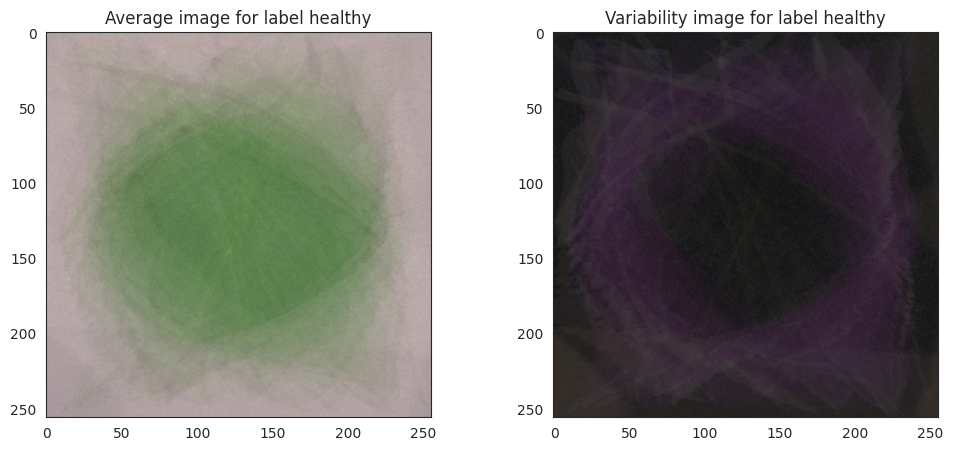

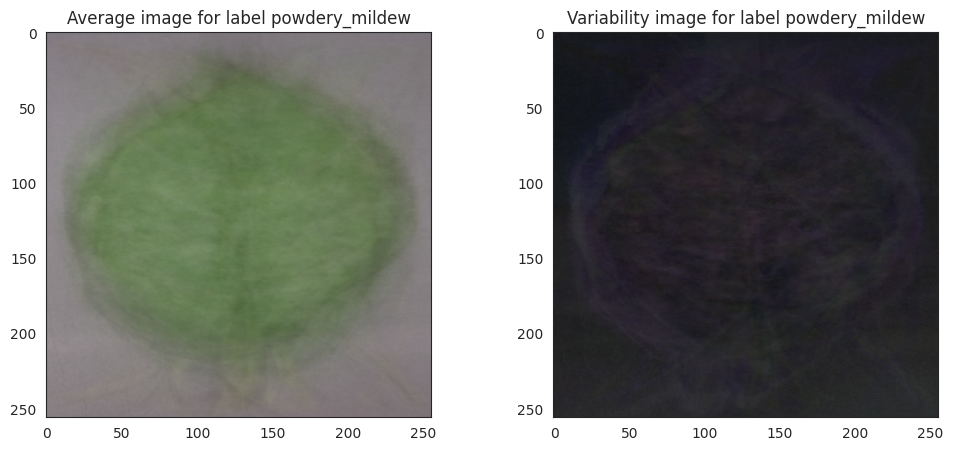

In [14]:
plot_mean_variability_per_labels(X=X, y=y, figsize=(12,5),save_image=True)


---

# Difference between the average healthy leaf and one infected with powdery mildew

In [15]:
def diff_bet_avg_image_labels_data_as_array(X, y, label_1, label_2, figsize=(20,5), save_image=False):
    # Find indices of images with label 1 and label 2
    idx_1 = np.where(y == label_1)[0]
    idx_2 = np.where(y == label_2)[0]
    
    # Calculate mean image for label 1 and label 2
    mean_1 = np.mean(X[idx_1], axis=0)
    mean_2 = np.mean(X[idx_2], axis=0)
    
    # Calculate difference image
    diff = mean_1 - mean_2
    
    # Plot images and show or save
    fig, axes = plt.subplots(1, 3, figsize=figsize)
    axes[0].imshow(mean_1, cmap='gray')
    axes[0].set_title(f"Average {label_1}")
    axes[1].imshow(mean_2, cmap='gray')
    axes[1].set_title(f"Average {label_2}")
    axes[2].imshow(diff, cmap='gray')
    axes[2].set_title(f"Difference: {label_1} - {label_2}")
    if save_image:
        plt.savefig("avg_diff.png", bbox_inches='tight', dpi=150)
    else:
        plt.tight_layout()
        plt.show()
        
    return diff



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


array([[[0.19150327, 0.15607843, 0.13764706],
        [0.1930719 , 0.15803922, 0.13921569],
        [0.17973856, 0.14588236, 0.12483661],
        ...,
        [0.20222222, 0.16666667, 0.15150327],
        [0.20392157, 0.16901961, 0.15385621],
        [0.21084967, 0.17568628, 0.16078432]],

       [[0.19633987, 0.16026144, 0.14326798],
        [0.19346406, 0.15830066, 0.14091504],
        [0.18183007, 0.14692811, 0.12797386],
        ...,
        [0.21464052, 0.17921569, 0.16392157],
        [0.2206536 , 0.18562092, 0.17019608],
        [0.20326797, 0.16810458, 0.15320262]],

       [[0.2103268 , 0.17294118, 0.16013072],
        [0.1779085 , 0.14104576, 0.12718955],
        [0.18104575, 0.14509804, 0.12967321],
        ...,
        [0.22810457, 0.19320262, 0.17738562],
        [0.2124183 , 0.1779085 , 0.16222223],
        [0.2248366 , 0.19019608, 0.17477125]],

       ...,

       [[0.12771242, 0.10026144, 0.10392157],
        [0.14339869, 0.11607843, 0.11947713],
        [0.14718954, 0

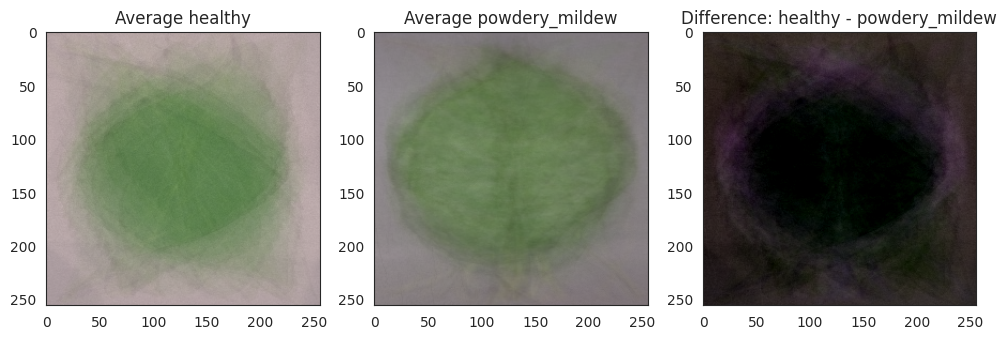

In [16]:
diff_bet_avg_image_labels_data_as_array(X=X, y=y,
                                        label_1='healthy', label_2='powdery_mildew',
                                        figsize=(12,10),
                                        save_image=True
                                        )




# Image Montage

In [17]:
import random

def image_montage(dir_path, label_to_display, nrows, ncols, figsize=(15,10)):
    # Check if label exists in the folder
    labels = os.listdir(dir_path)
    if label_to_display not in labels:
        print("The label you selected doesn't exist.")
        print(f"The existing options are: {labels}")
        return
    
    # Subset the class you are interested to display
    images_list = os.listdir(os.path.join(dir_path, label_to_display))
    if nrows * ncols < len(images_list):
        img_idx = random.sample(images_list, nrows * ncols)
    else:
        print(f"Decrease nrows or ncols to create your montage. \nThere are {len(images_list)} in your subset. "
              f"You requested a montage with {nrows * ncols} spaces")
        return
    
    # Create list of axes indices based on nrows and ncols
    plot_idx = [(i, j) for i in range(nrows) for j in range(ncols)]
    
    # Create a Figure and display images
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    for i, ax in enumerate(axes.flat):
        img = imread(os.path.join(dir_path, label_to_display, img_idx[i]))
        img_shape = img.shape
        ax.imshow(img)
        ax.set_title(f"Width {img_shape[1]}px x Height {img_shape[0]}px")
        ax.set_xticks([])
        ax.set_yticks([])
    
    plt.tight_layout()
    plt.show()


powdery_mildew


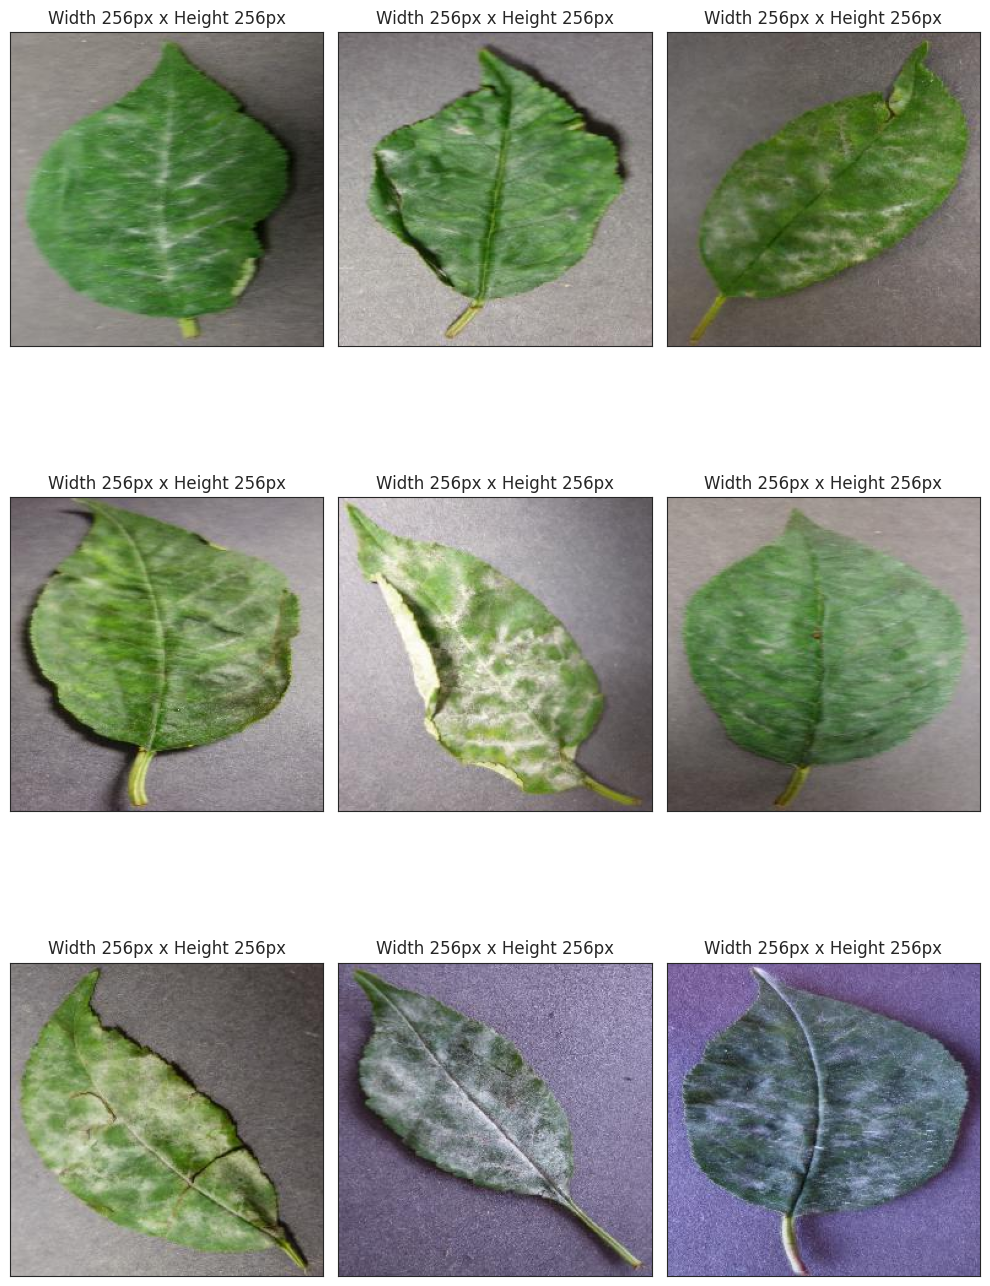



healthy


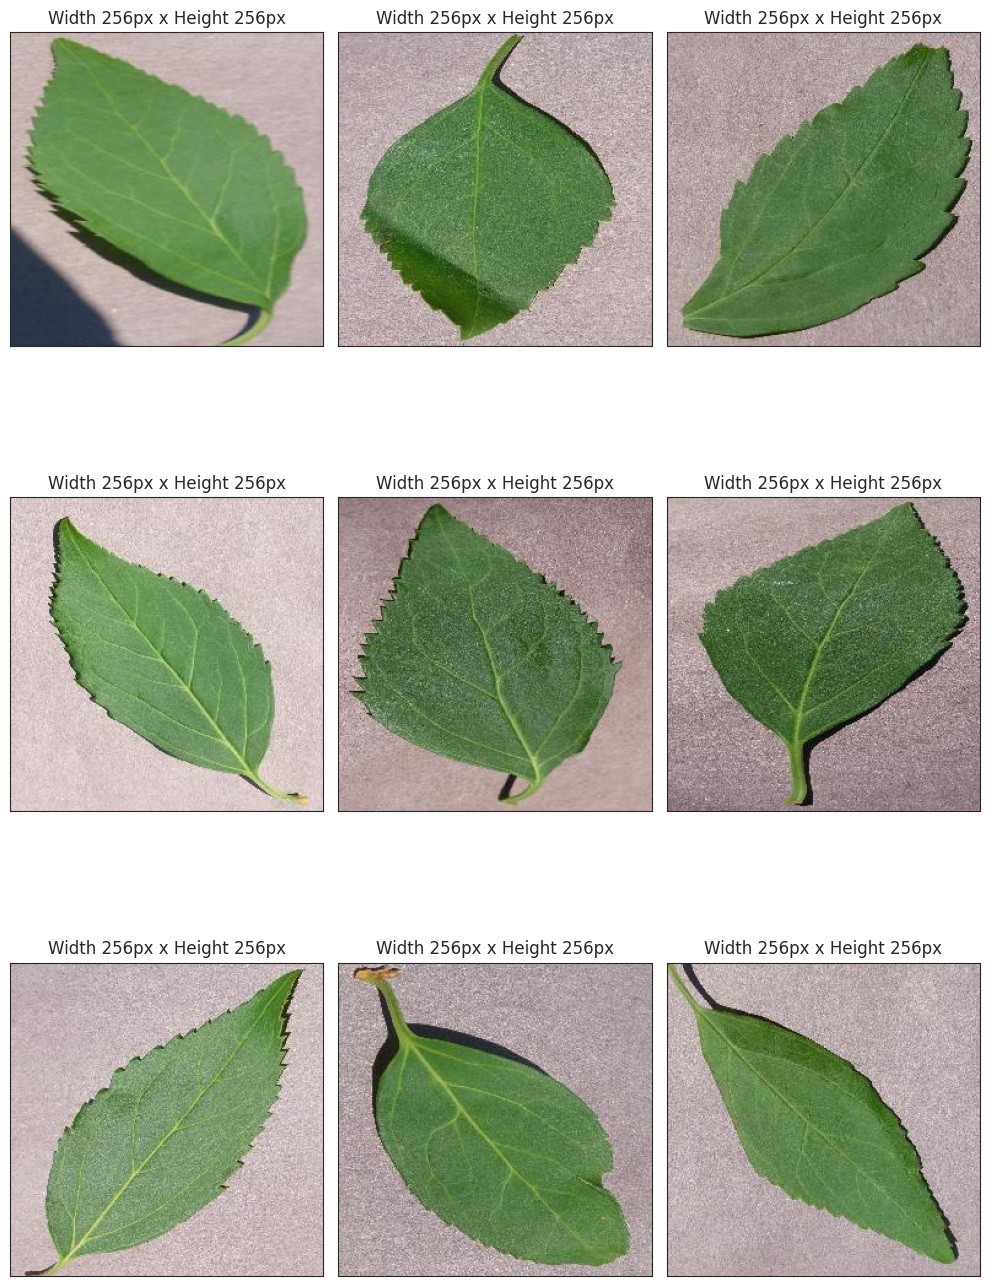

In [18]:
for label in labels:
  print(label)
  image_montage(dir_path= train_path,
                label_to_display= label,
                nrows=3, ncols=3,
                figsize=(10,15)
                )
  print("\n")

# Conclusion


* Images from test set were resized and determined
* Difference between healthy cherry leaves and infected with powderly mildew ploted
* Image montage created in order to use it in dashboard next